In [2]:
from pycaret.datasets import get_data

import pickle
def load_pkl(path):
    with open(path, 'rb') as f:
        return pickle.load(f)
from pycaret.regression import *
import tqdm
import pandas as pd

In [3]:
name= '4'

juice = pd.read_csv(f'./data{name}.csv')
exp = RegressionExperiment()

train_df = juice.head(100)
test_df = juice.tail(60)

juice.head(100).label.value_counts()

3.0    20
2.0    20
1.0    19
5.0    15
4.0    12
0.0    10
6.0     4
Name: label, dtype: int64

In [136]:
juice

,HM_ACA_R_Ratio,ED_NCCT_original_firstorder_Skewness,HM_original_shape_Elongation,HM_original_shape_Maximum2DDiameterColumn,发病到首次影像检查时间间隔,ED_NCCT_original_firstorder_Entropy,止吐护胃,HM_PCA_R_Ratio,冠心病史,ED_original_shape_Maximum3DDiameter,label
0,0.000521,0.168612,0.707550,0.334207,0.094737,0.296358,1.0,0.143941,0.0,0.551518,4.0
1,1.000000,0.448773,0.605696,0.309257,0.115789,0.478909,1.0,0.362184,0.0,0.461163,0.0
2,0.108302,0.515494,0.492735,0.441673,0.073684,0.505907,1.0,0.119421,0.0,0.684317,5.0
3,0.004520,0.381890,0.215563,0.356396,0.031579,0.338016,0.0,0.034863,0.0,0.541047,4.0
4,0.000000,0.420716,0.933752,0.142206,0.200000,0.320019,1.0,0.001373,0.0,0.939951,3.0
...,...,...,...,...,...,...,...,...,...,...,...
155,0.000000,0.509034,0.469155,0.910222,0.221053,0.278287,1.0,0.000000,1.0,0.370756,NaN
156,0.000000,0.413842,0.520439,0.147023,0.010526,0.517369,1.0,0.000000,0.0,0.281777,NaN
157,0.005406,0.502975,0.704972,0.261678,0.107368,0.432915,1.0,0.071833,0.0,0.326324,NaN
158,0.000000,0.434646,0.889654,0.312108,0.115789,0.602427,1.0,0.000000,0.0,0.435743,NaN


In [5]:
top5list = {}
for random_state in tqdm.tqdm(range(25,45,1)):
    exp.set_config('seed', random_state)
    exp_name = exp.setup(data = train_df,  target = 'label',verbose=False)
    top5 = exp.compare_models(sort = 'RMSE',n_select = 5,budget_time=360,verbose=True,include=list(exp.models().reset_index()['ID']))
    top5list[random_state] = [top5,exp._display_container[1] ] 

  0%|          | 0/20 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ard,Automatic Relevance Determination,1.3601,2.6009,1.5663,-0.0875,0.5484,0.5641,0.6890
lr,Linear Regression,1.3854,2.8020,1.6252,-0.2089,0.5773,0.5936,4.7240
lar,Least Angle Regression,1.3854,2.8020,1.6252,-0.2089,0.5773,0.5936,0.7050
et,Extra Trees Regressor,1.3984,2.8255,1.6357,-0.2225,0.5726,0.5665,0.6060
mlp,MLP Regressor,1.4066,2.8396,1.6397,-0.2357,0.5735,0.5901,0.5990
huber,Huber Regressor,1.3551,2.9084,1.6403,-0.2452,0.5888,0.5926,0.5860
catboost,CatBoost Regressor,1.4161,2.7923,1.6508,-0.2236,0.5793,0.5362,1.3090
ridge,Ridge Regression,1.4341,2.8517,1.6517,-0.2253,0.5733,0.5885,0.9320
knn,K Neighbors Regressor,1.3886,2.9931,1.6572,-0.2843,0.5644,0.5429,0.5690
rf,Random Forest Regressor,1.4334,2.8908,1.6641,-0.2558,0.5828,0.5539,0.6190


  5%|▌         | 1/20 [07:59<2:31:54, 479.72s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,1.2057,2.3840,1.4842,-0.0653,0.4760,0.5209,0.5910
ridge,Ridge Regression,1.2853,2.4422,1.5125,-0.0668,0.4838,0.5376,0.7470
br,Bayesian Ridge,1.2916,2.4662,1.5181,-0.0694,0.4846,0.5320,0.5740
mlp,MLP Regressor,1.2542,2.4638,1.5248,-0.0948,0.4953,0.5188,0.5990
svm,Support Vector Regression,1.3039,2.5369,1.5333,-0.1068,0.4837,0.5338,0.5960
kr,Kernel Ridge,1.2693,2.5212,1.5419,-0.1389,0.5037,0.4987,0.5740
catboost,CatBoost Regressor,1.2773,2.6313,1.5562,-0.1267,0.5012,0.4823,1.5400
ard,Automatic Relevance Determination,1.3165,2.7202,1.5969,-0.2307,0.5144,0.5352,0.5760
en,Elastic Net,1.3569,2.7118,1.5985,-0.1678,0.5075,0.5252,0.7200
dummy,Dummy Regressor,1.3569,2.7118,1.5985,-0.1678,0.5075,0.5252,3.6210


 10%|█         | 2/20 [14:53<2:12:11, 440.66s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
mlp,MLP Regressor,1.2702,2.3898,1.4944,-0.2038,0.5052,0.5484,0.5970
ridge,Ridge Regression,1.2944,2.4154,1.4945,-0.0867,0.5087,0.5421,0.5860
ard,Automatic Relevance Determination,1.2885,2.4499,1.4974,-0.0436,0.5091,0.5381,0.5700
br,Bayesian Ridge,1.3057,2.4509,1.5046,-0.0965,0.5130,0.5446,0.5880
kr,Kernel Ridge,1.2828,2.4748,1.5147,-0.1001,0.5229,0.5189,0.5640
svm,Support Vector Regression,1.3419,2.5875,1.5560,-0.1960,0.5248,0.5304,0.5650
et,Extra Trees Regressor,1.2679,2.6295,1.5597,-0.1813,0.5174,0.5202,0.6090
knn,K Neighbors Regressor,1.3343,2.6680,1.5698,-0.1945,0.5189,0.5212,0.5810
lr,Linear Regression,1.3306,2.6001,1.5713,-0.2537,0.5304,0.5832,0.6870
omp,Orthogonal Matching Pursuit,1.3823,2.7040,1.5761,-0.1734,0.5274,0.5596,0.5740


 15%|█▌        | 3/20 [20:37<1:52:23, 396.69s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
svm,Support Vector Regression,1.3220,2.7229,1.6113,-0.1022,0.5315,0.5395,0.5730
lightgbm,Light Gradient Boosting Machine,1.3260,2.7565,1.6116,-0.1147,0.5349,0.5183,9.9050
catboost,CatBoost Regressor,1.3154,2.7696,1.6259,-0.1132,0.5390,0.5025,1.4650
ridge,Ridge Regression,1.4022,2.8560,1.6428,-0.1377,0.5436,0.5950,0.5690
rf,Random Forest Regressor,1.3693,2.8422,1.6487,-0.1633,0.5476,0.5353,0.6460
mlp,MLP Regressor,1.3817,2.9003,1.6499,-0.1824,0.5443,0.5893,0.6050
kr,Kernel Ridge,1.4064,2.9229,1.6656,-0.1622,0.5517,0.5854,0.5710
llar,Lasso Least Angle Regression,1.4494,2.8505,1.6714,-0.1613,0.5529,0.6088,0.5670
dummy,Dummy Regressor,1.4494,2.8505,1.6714,-0.1613,0.5529,0.6088,0.5690
lasso,Lasso Regression,1.4494,2.8505,1.6714,-0.1613,0.5529,0.6088,0.5660


 20%|██        | 4/20 [26:10<1:39:07, 371.75s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,1.2747,2.5058,1.5038,0.1205,0.5260,0.4977,0.5800
kr,Kernel Ridge,1.3336,2.5607,1.5337,0.1155,0.5369,0.5647,0.5710
et,Extra Trees Regressor,1.2573,2.6185,1.5355,0.1292,0.5349,0.5085,0.6210
ridge,Ridge Regression,1.3422,2.5940,1.5516,0.1043,0.5369,0.5823,0.5680
mlp,MLP Regressor,1.3368,2.6446,1.5568,0.0892,0.5482,0.5780,0.5950
br,Bayesian Ridge,1.3575,2.6514,1.5714,0.0887,0.5432,0.5823,0.5720
svm,Support Vector Regression,1.3393,2.6913,1.5823,0.0773,0.5440,0.5615,0.5730
tr,TheilSen Regressor,1.3910,2.8963,1.6090,-0.0187,0.5736,0.5886,0.7870
catboost,CatBoost Regressor,1.3130,2.7927,1.6095,0.0460,0.5428,0.4724,1.5720
omp,Orthogonal Matching Pursuit,1.4166,2.8045,1.6163,0.0413,0.5488,0.6120,0.5720


 25%|██▌       | 5/20 [31:36<1:28:49, 355.28s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,1.1371,2.2777,1.4277,-0.2083,0.4846,0.4496,0.5880
svm,Support Vector Regression,1.2287,2.4219,1.5074,-0.2531,0.5073,0.5096,0.5740
et,Extra Trees Regressor,1.2793,2.6839,1.5598,-0.3555,0.5243,0.5148,0.6200
rf,Random Forest Regressor,1.3173,2.6813,1.5821,-0.3849,0.5234,0.5181,0.6210
ridge,Ridge Regression,1.3314,2.6286,1.5857,-0.3418,0.5236,0.5806,0.6060
catboost,CatBoost Regressor,1.2588,2.6737,1.5895,-0.3651,0.5304,0.4852,1.5000
ard,Automatic Relevance Determination,1.3514,2.7125,1.5980,-0.4473,0.5292,0.5999,0.5720
br,Bayesian Ridge,1.3398,2.6611,1.5998,-0.3405,0.5250,0.5773,0.5920
lightgbm,Light Gradient Boosting Machine,1.3019,2.7032,1.6133,-0.3236,0.5357,0.5027,9.6000
en,Elastic Net,1.3977,2.6945,1.6221,-0.3625,0.5254,0.6119,0.6070


 30%|███       | 6/20 [37:09<1:21:04, 347.50s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,1.3449,2.6358,1.5881,-0.1302,0.5267,0.5591,0.6060
kr,Kernel Ridge,1.3275,2.6303,1.5887,-0.1344,0.5322,0.5350,0.5760
et,Extra Trees Regressor,1.3089,2.6921,1.5933,-0.1133,0.5297,0.5438,0.6220
svm,Support Vector Regression,1.3587,2.7496,1.6138,-0.1640,0.5347,0.5607,0.5830
catboost,CatBoost Regressor,1.3424,2.7372,1.6234,-0.1553,0.5365,0.5304,1.4340
knn,K Neighbors Regressor,1.3400,2.8131,1.6285,-0.2041,0.5277,0.5654,0.5780
br,Bayesian Ridge,1.3882,2.8105,1.6381,-0.1947,0.5384,0.5710,0.5830
omp,Orthogonal Matching Pursuit,1.4311,2.8400,1.6408,-0.1761,0.5364,0.5808,0.5810
mlp,MLP Regressor,1.3859,2.8772,1.6492,-0.2461,0.5515,0.5970,0.6120
lasso,Lasso Regression,1.4499,2.9160,1.6645,-0.1764,0.5442,0.6043,0.6000


 35%|███▌      | 7/20 [42:38<1:13:59, 341.47s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
kr,Kernel Ridge,1.3556,2.7488,1.5944,-0.6321,0.5567,0.5103,0.5780
ada,AdaBoost Regressor,1.3536,2.8248,1.6042,-0.7650,0.5581,0.5341,0.5970
ridge,Ridge Regression,1.3889,2.8148,1.6238,-0.6201,0.5564,0.5428,0.5800
lightgbm,Light Gradient Boosting Machine,1.3706,2.7667,1.6240,-0.6008,0.5645,0.4628,9.1310
svm,Support Vector Regression,1.3815,2.8921,1.6277,-0.7159,0.5591,0.4992,0.6020
br,Bayesian Ridge,1.4146,2.9045,1.6477,-0.6731,0.5653,0.5478,0.5790
mlp,MLP Regressor,1.3796,2.9177,1.6487,-0.7652,0.5785,0.5494,0.6300
knn,K Neighbors Regressor,1.3943,3.0274,1.6601,-0.7057,0.5634,0.5293,0.5940
tr,TheilSen Regressor,1.3796,3.0818,1.6646,-0.8791,0.5723,0.5262,0.8120
catboost,CatBoost Regressor,1.4161,2.9774,1.6737,-0.8382,0.5762,0.5087,1.4070


 40%|████      | 8/20 [48:07<1:07:30, 337.51s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,1.1257,2.0697,1.3894,-0.0774,0.4487,0.5349,0.6000
et,Extra Trees Regressor,1.1493,2.0507,1.4021,-0.0370,0.4633,0.5296,0.6250
catboost,CatBoost Regressor,1.1480,2.0844,1.4191,0.0295,0.4693,0.5033,1.4400
svm,Support Vector Regression,1.1921,2.0674,1.4211,-0.0001,0.4597,0.5485,0.6070
mlp,MLP Regressor,1.1833,2.1296,1.4350,-0.0888,0.4790,0.5674,0.5980
ridge,Ridge Regression,1.2500,2.1934,1.4576,-0.0608,0.4756,0.5892,0.5860
rf,Random Forest Regressor,1.2141,2.2397,1.4777,-0.0756,0.4778,0.5400,0.6350
br,Bayesian Ridge,1.2734,2.2666,1.4825,-0.0965,0.4830,0.5944,0.5870
kr,Kernel Ridge,1.2561,2.3134,1.4871,-0.0696,0.4900,0.5655,0.5840
ada,AdaBoost Regressor,1.2561,2.4112,1.5126,-0.1167,0.4750,0.5567,0.6060


 45%|████▌     | 9/20 [53:35<1:01:20, 334.57s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,1.1914,2.2451,1.4408,0.1058,0.4846,0.5190,0.5940
ada,AdaBoost Regressor,1.2241,2.4812,1.4703,0.1580,0.4899,0.4573,0.6040
catboost,CatBoost Regressor,1.2718,2.4411,1.5030,0.0898,0.5133,0.4889,1.3380
et,Extra Trees Regressor,1.2126,2.5588,1.5273,0.0496,0.5322,0.4657,0.6270
rf,Random Forest Regressor,1.3101,2.6978,1.5665,0.0266,0.5252,0.5127,0.6310
svm,Support Vector Regression,1.3513,2.5814,1.5667,-0.0206,0.5227,0.5272,0.5840
ridge,Ridge Regression,1.3535,2.6243,1.5690,0.0072,0.5143,0.5584,0.5820
kr,Kernel Ridge,1.3654,2.7101,1.5854,-0.0242,0.5372,0.5386,0.5860
mlp,MLP Regressor,1.3719,2.7007,1.5898,-0.0430,0.5370,0.5748,0.6080
br,Bayesian Ridge,1.3746,2.6849,1.5921,-0.0178,0.5275,0.5519,0.5840


 50%|█████     | 10/20 [59:03<55:26, 332.62s/it] 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.1304,1.9651,1.3862,-0.2700,0.4745,0.4679,0.6260
ard,Automatic Relevance Determination,1.2033,2.0882,1.4186,-0.4650,0.4798,0.5066,0.5890
lar,Least Angle Regression,1.2194,2.1228,1.4264,-0.4374,0.4795,0.5340,0.5820
lr,Linear Regression,1.2194,2.1228,1.4264,-0.4374,0.4795,0.5340,0.5990
xgboost,Extreme Gradient Boosting,1.1913,2.1271,1.4375,-0.5538,0.4910,0.5017,0.5950
catboost,CatBoost Regressor,1.1673,2.1258,1.4427,-0.4881,0.4899,0.4732,1.3230
mlp,MLP Regressor,1.2605,2.1884,1.4440,-0.6482,0.4872,0.5472,0.6120
ridge,Ridge Regression,1.2411,2.1805,1.4558,-0.5669,0.4912,0.5290,0.5850
knn,K Neighbors Regressor,1.1943,2.2263,1.4575,-0.5613,0.4971,0.5444,0.6160
br,Bayesian Ridge,1.2466,2.2102,1.4658,-0.5844,0.4945,0.5298,0.5880


 55%|█████▌    | 11/20 [1:04:33<49:46, 331.81s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ard,Automatic Relevance Determination,1.2190,2.1844,1.4583,-0.8128,0.4870,0.5432,0.5870
svm,Support Vector Regression,1.2282,2.3043,1.4813,-1.1481,0.4783,0.5204,0.5910
et,Extra Trees Regressor,1.2239,2.2767,1.4824,-0.9965,0.4896,0.5346,0.6440
ridge,Ridge Regression,1.2481,2.2845,1.4853,-0.9611,0.4847,0.5455,0.5930
catboost,CatBoost Regressor,1.2393,2.3644,1.4908,-1.3892,0.4844,0.5269,1.3140
mlp,MLP Regressor,1.2228,2.3545,1.4961,-0.9255,0.4918,0.5350,0.6210
kr,Kernel Ridge,1.2627,2.3545,1.5009,-0.9363,0.4898,0.5443,0.5920
lr,Linear Regression,1.2618,2.3648,1.5080,-0.9772,0.4993,0.5691,0.6010
lar,Least Angle Regression,1.2618,2.3648,1.5080,-0.9772,0.4993,0.5691,0.5890
ada,AdaBoost Regressor,1.2192,2.3712,1.5084,-1.1988,0.4869,0.5191,0.6030


 60%|██████    | 12/20 [1:10:08<44:20, 332.61s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0940,1.8366,1.3027,0.2201,0.4944,0.4127,0.6350
lr,Linear Regression,1.0835,1.8546,1.3212,0.1514,0.4782,0.4694,0.5910
lar,Least Angle Regression,1.0835,1.8546,1.3212,0.1514,0.4782,0.4694,0.6060
mlp,MLP Regressor,1.0569,1.8599,1.3291,0.1580,0.4628,0.4460,0.6130
ard,Automatic Relevance Determination,1.0885,1.8791,1.3354,0.1822,0.4858,0.4432,0.5950
svm,Support Vector Regression,1.0851,1.9090,1.3359,0.2062,0.4852,0.4426,0.5980
br,Bayesian Ridge,1.0949,1.8681,1.3396,0.1806,0.4903,0.4501,0.5940
huber,Huber Regressor,1.0633,1.9435,1.3473,0.1199,0.4421,0.4849,0.5970
ridge,Ridge Regression,1.0991,1.8976,1.3511,0.1919,0.5003,0.4394,0.6010
rf,Random Forest Regressor,1.1140,2.0210,1.3578,0.1786,0.5053,0.3866,0.6520


 65%|██████▌   | 13/20 [1:15:39<38:44, 332.14s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
tr,TheilSen Regressor,0.6434,1.2090,0.7707,-1.2585,0.2766,0.2725,0.6580
ridge,Ridge Regression,1.3146,2.4567,1.5535,-1.7360,0.5411,0.4921,0.5960
svm,Support Vector Regression,1.2635,2.4840,1.5559,-1.6666,0.5461,0.4619,0.5970
ard,Automatic Relevance Determination,1.3054,2.4999,1.5620,-1.1439,0.5389,0.4983,0.5950
br,Bayesian Ridge,1.3306,2.5028,1.5689,-1.7936,0.5444,0.4985,0.6010
mlp,MLP Regressor,1.3255,2.5859,1.5830,-1.6751,0.5510,0.5100,0.6230
lar,Least Angle Regression,1.3123,2.5958,1.5914,-1.3997,0.5523,0.5141,0.6030
lr,Linear Regression,1.3123,2.5958,1.5914,-1.3997,0.5523,0.5141,0.5980
catboost,CatBoost Regressor,1.3463,2.6913,1.6091,-1.0312,0.5584,0.4442,1.4550
omp,Orthogonal Matching Pursuit,1.3690,2.6604,1.6240,-1.8822,0.5592,0.4925,0.5980


 70%|███████   | 14/20 [1:22:11<35:02, 350.40s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.1930,2.2635,1.4438,-0.0651,0.4990,0.5109,0.6460
knn,K Neighbors Regressor,1.2086,2.3800,1.4816,-0.1304,0.5096,0.5109,0.6100
ard,Automatic Relevance Determination,1.2504,2.3326,1.4841,-0.1113,0.5022,0.5297,0.6780
ridge,Ridge Regression,1.2780,2.3797,1.5067,-0.1164,0.5120,0.5450,0.6140
br,Bayesian Ridge,1.2834,2.3955,1.5117,-0.1151,0.5181,0.5361,0.6790
kr,Kernel Ridge,1.2824,2.4896,1.5268,-0.1414,0.5334,0.5206,0.6120
mlp,MLP Regressor,1.2721,2.4776,1.5321,-0.1841,0.5136,0.5614,0.6520
svm,Support Vector Regression,1.2868,2.4659,1.5360,-0.2179,0.5324,0.5267,0.6060
omp,Orthogonal Matching Pursuit,1.3647,2.6140,1.5748,-0.1705,0.5363,0.5433,0.6860
rf,Random Forest Regressor,1.3260,2.6221,1.5789,-0.1695,0.5246,0.5433,0.6590


 75%|███████▌  | 15/20 [1:27:49<28:52, 346.43s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
svm,Support Vector Regression,1.3195,2.5635,1.5697,-0.0104,0.5219,0.5507,0.6100
ridge,Ridge Regression,1.3401,2.5667,1.5822,-0.0322,0.5218,0.5556,0.6120
catboost,CatBoost Regressor,1.3246,2.6227,1.5943,-0.0277,0.5357,0.5276,1.5570
br,Bayesian Ridge,1.3626,2.6181,1.5984,-0.0424,0.5248,0.5623,0.6170
lr,Linear Regression,1.3202,2.6483,1.6001,-0.0810,0.5250,0.5634,0.6170
lar,Least Angle Regression,1.3202,2.6483,1.6001,-0.0810,0.5250,0.5634,0.6140
huber,Huber Regressor,1.3175,2.6761,1.6011,-0.1136,0.5266,0.5609,0.6200
kr,Kernel Ridge,1.3563,2.6850,1.6079,-0.0848,0.5298,0.5581,0.6230
ard,Automatic Relevance Determination,1.3590,2.6842,1.6080,-0.0879,0.5274,0.5783,0.6170
mlp,MLP Regressor,1.3492,2.6776,1.6096,-0.0863,0.5356,0.5618,0.6330


 80%|████████  | 16/20 [1:33:33<23:02, 345.74s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ard,Automatic Relevance Determination,1.2405,2.3053,1.4487,0.1055,0.4577,0.5308,0.6110
knn,K Neighbors Regressor,1.2543,2.4417,1.4935,0.0182,0.4776,0.5231,0.6470
kr,Kernel Ridge,1.2796,2.4168,1.5034,0.0454,0.4720,0.5490,0.6120
svm,Support Vector Regression,1.2706,2.4299,1.5103,0.0321,0.4757,0.5567,0.6180
omp,Orthogonal Matching Pursuit,1.3134,2.4689,1.5122,0.0205,0.4689,0.5745,0.6100
et,Extra Trees Regressor,1.2126,2.4854,1.5235,0.0091,0.4886,0.5313,0.6480
ridge,Ridge Regression,1.3026,2.4956,1.5259,0.0172,0.4794,0.5636,0.6070
catboost,CatBoost Regressor,1.2097,2.5248,1.5450,-0.0371,0.4804,0.4908,1.4920
mlp,MLP Regressor,1.3385,2.5946,1.5492,-0.0323,0.5008,0.5912,0.6310
br,Bayesian Ridge,1.3313,2.5703,1.5554,-0.0147,0.4838,0.5732,0.6250


 85%|████████▌ | 17/20 [1:39:13<17:12, 344.06s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
svm,Support Vector Regression,1.3360,2.7193,1.6025,-0.1216,0.5489,0.5656,0.6080
ridge,Ridge Regression,1.3778,2.7233,1.6066,-0.1303,0.5447,0.5997,0.6050
tr,TheilSen Regressor,1.3457,2.7966,1.6086,-0.1898,0.5529,0.5821,0.8210
lr,Linear Regression,1.3623,2.7607,1.6124,-0.1779,0.5512,0.6102,0.6170
lar,Least Angle Regression,1.3623,2.7607,1.6124,-0.1779,0.5512,0.6102,0.6120
ard,Automatic Relevance Determination,1.3586,2.7933,1.6156,-0.1325,0.5439,0.6032,0.6120
kr,Kernel Ridge,1.3783,2.7841,1.6208,-0.1476,0.5486,0.5879,0.6300
huber,Huber Regressor,1.3755,2.8060,1.6277,-0.2527,0.5609,0.6157,0.6180
mlp,MLP Regressor,1.3825,2.8078,1.6278,-0.1728,0.5510,0.6116,0.6300
llar,Lasso Least Angle Regression,1.4245,2.7767,1.6328,-0.1784,0.5498,0.6301,0.6070


 90%|█████████ | 18/20 [1:44:56<11:27, 343.72s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.2859,2.4427,1.5373,-0.3765,0.5337,0.5083,1.4060
mlp,MLP Regressor,1.2705,2.4788,1.5416,-0.5536,0.5362,0.5460,0.6330
lar,Least Angle Regression,1.2796,2.5338,1.5521,-0.6027,0.5306,0.5671,0.6100
lr,Linear Regression,1.2796,2.5338,1.5521,-0.6027,0.5306,0.5671,0.6130
ridge,Ridge Regression,1.3144,2.4775,1.5522,-0.4874,0.5330,0.5661,0.6120
br,Bayesian Ridge,1.3430,2.5818,1.5838,-0.5294,0.5416,0.5752,0.6140
kr,Kernel Ridge,1.3218,2.6048,1.5848,-0.5645,0.5459,0.5528,0.6200
svm,Support Vector Regression,1.3353,2.6015,1.5904,-0.5114,0.5439,0.5581,0.6120
et,Extra Trees Regressor,1.3137,2.5932,1.5914,-0.7029,0.5603,0.5653,0.6530
rf,Random Forest Regressor,1.3554,2.6553,1.5944,-0.4562,0.5508,0.5499,0.6600


 95%|█████████▌| 19/20 [1:50:36<05:42, 342.78s/it]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,1.2714,2.5834,1.5340,-0.5647,0.4885,0.6010,0.6240
ridge,Ridge Regression,1.3723,2.5977,1.5758,-0.5574,0.5031,0.6217,0.6120
svm,Support Vector Regression,1.3338,2.6716,1.5789,-0.5925,0.5052,0.5954,0.6150
br,Bayesian Ridge,1.3743,2.6162,1.5817,-0.5532,0.5037,0.6182,0.6150
catboost,CatBoost Regressor,1.3068,2.8359,1.6099,-0.5756,0.5102,0.5609,1.5320
mlp,MLP Regressor,1.3848,2.7854,1.6138,-0.7266,0.5148,0.6286,0.6460
lightgbm,Light Gradient Boosting Machine,1.3206,2.7249,1.6152,-0.8100,0.5113,0.5650,9.2260
en,Elastic Net,1.3950,2.7439,1.6346,-0.6270,0.5189,0.6043,0.6220
dummy,Dummy Regressor,1.3950,2.7439,1.6346,-0.6270,0.5189,0.6043,0.6440
llar,Lasso Least Angle Regression,1.3950,2.7439,1.6346,-0.6270,0.5189,0.6043,0.6140


100%|██████████| 20/20 [1:56:13<00:00, 348.68s/it]


In [115]:
list(exp.models().reset_index()['Name'])

['Linear Regression',
 'Lasso Regression',
 'Ridge Regression',
 'Elastic Net',
 'Least Angle Regression',
 'Lasso Least Angle Regression',
 'Orthogonal Matching Pursuit',
 'Bayesian Ridge',
 'Automatic Relevance Determination',
 'Passive Aggressive Regressor',
 'Random Sample Consensus',
 'TheilSen Regressor',
 'Huber Regressor',
 'Kernel Ridge',
 'Support Vector Regression',
 'K Neighbors Regressor',
 'Decision Tree Regressor',
 'Random Forest Regressor',
 'Extra Trees Regressor',
 'AdaBoost Regressor',
 'Gradient Boosting Regressor',
 'MLP Regressor',
 'Extreme Gradient Boosting',
 'Light Gradient Boosting Machine',
 'CatBoost Regressor',
 'Dummy Regressor']

In [116]:
exp.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef

def get_metric(true_labels,predicted_labels):
    # 计算准确率
    accuracy = accuracy_score(true_labels, predicted_labels)
    #print("Accuracy:", accuracy)

    # 计算精确度、召回率和F1分数
    precision = precision_score(true_labels, predicted_labels, average='macro')
    recall = recall_score(true_labels, predicted_labels, average='macro')
    f1 = f1_score(true_labels, predicted_labels, average='macro')
    #print("Precision:", precision)
    #print("Recall:", recall)
    #print("F1 Score:", f1)

    # 计算accuracy within ±1 mRS category
    within_1_accuracy = sum(abs(a - b) <= 1 for a, b in zip(true_labels, predicted_labels)) / len(true_labels)
    #print("Accuracy within ±1 mRS category:", within_1_accuracy)

    return [accuracy,within_1_accuracy,precision,recall,f1]


In [118]:
def map_to_class(predicted_value,thouhold=.5):
    thresholds = list(range(1,7))
    thresholds = [i+thouhold for i in thresholds]
    #print(thresholds)
    for i, threshold in enumerate(thresholds):
        if predicted_value <= threshold:
            return i + 1  # 类别从1开始
    return 6  # 如果连续变量值大于5.5，则映射到类别6

In [119]:
result_all = []
name= '4'
for i in tqdm.tqdm(top5list.keys()):
    for k in top5list[i][0]:
        juice = pd.read_csv(f'./data{name}.csv').head(100)
        train_df = juice.head(100)
        exp = RegressionExperiment()
        exp.set_config('seed', i)
        exp_name = exp.setup(data = train_df,  target = 'label',verbose=False)
        
        juice['predict'] = list(exp.predict_model(k,data=juice.iloc[:,:-1]).prediction_label)
        juice['predict'] = juice['predict'].apply(map_to_class)

        result = get_metric(juice['predict'],juice['label'])
        result.append(k)
        result_all.append(result)

  0%|          | 0/20 [00:00<?, ?it/s]

  5%|▌         | 1/20 [00:14<04:32, 14.36s/it]

 10%|█         | 2/20 [00:28<04:16, 14.24s/it]

 15%|█▌        | 3/20 [00:42<04:00, 14.12s/it]

 20%|██        | 4/20 [00:56<03:45, 14.10s/it]

 25%|██▌       | 5/20 [01:10<03:30, 14.06s/it]

 30%|███       | 6/20 [01:24<03:17, 14.08s/it]

 35%|███▌      | 7/20 [01:38<03:02, 14.04s/it]

 40%|████      | 8/20 [01:52<02:47, 14.00s/it]

 45%|████▌     | 9/20 [02:06<02:34, 14.02s/it]

 50%|█████     | 10/20 [02:20<02:20, 14.04s/it]

 55%|█████▌    | 11/20 [02:34<02:06, 14.05s/it]

 60%|██████    | 12/20 [02:48<01:52, 14.07s/it]

 65%|██████▌   | 13/20 [03:02<01:38, 14.02s/it]

 70%|███████   | 14/20 [03:16<01:23, 13.98s/it]

 75%|███████▌  | 15/20 [03:30<01:10, 14.02s/it]

 80%|████████  | 16/20 [03:44<00:55, 13.98s/it]

 85%|████████▌ | 17/20 [03:58<00:41, 13.96s/it]

 90%|█████████ | 18/20 [04:12<00:27, 13.92s/it]

 95%|█████████▌| 19/20 [04:26<00:13, 13.91s/it]

100%|██████████| 20/20 [04:40<00:00, 14.01s/it]


In [111]:
def save_pkl(path,obj):
    with open(path, 'wb') as f:
        pickle.dump(obj,f)
        
def load_pkl(path): 
    with open(path, 'rb') as f:
        return pickle.load(f) 
save_pkl(f'3a.pkl',top5list)

In [120]:
result_all = pd.DataFrame(result_all)
result_all.columns =['Accuracy','within_1_accuracy','Precision','Recall','F1','Model_real']

In [121]:
result_all['Model'] = result_all.Model_real.apply(lambda x:str(x).split('(')[0])
result_all['Model']  = result_all['Model'] .apply(lambda x:str(x).split('.')[0])

In [122]:
cols = ['Accuracy','within_1_accuracy','Precision','Recall','F1']
grouped = result_all.groupby('Model')
def mean(values):
    mean = values.mean()
    return mean
result2 = grouped.apply(lambda x: x.nlargest(3, columns=cols)).reset_index(drop=True)

In [123]:
result2 =result2.groupby('Model').agg(mean)
result2.sort_values(cols[0],ascending=False)

,Accuracy,within_1_accuracy,Precision,Recall,F1
Model,,,,,
<catboost,0.733333,0.900000,0.658271,0.697448,0.653786
ExtraTreesRegressor,0.730000,0.893333,0.671637,0.681437,0.660784
XGBRegressor,0.690000,0.910000,0.623935,0.645771,0.618537
RandomForestRegressor,0.503333,0.850000,0.392272,0.390614,0.350995
LGBMRegressor,0.375000,0.730000,0.285150,0.245584,0.248204
SVR,0.366667,0.686667,0.276942,0.235484,0.219097
AdaBoostRegressor,0.350000,0.910000,0.273308,0.251608,0.245519
KNeighborsRegressor,0.323333,0.763333,0.260109,0.280236,0.233616
MLPRegressor,0.296667,0.723333,0.227068,0.211984,0.190827


In [124]:
import numpy as np
cols = ['Accuracy','within_1_accuracy','Precision','Recall','F1']
grouped = result_all.groupby('Model')
def mean(values):
    mean = values.mean()
    std = values.std()
    
    std = np.nan_to_num(std, nan=np.random.choice([0.01, 0.02,.03]))
    return f"{mean:.2f} ± {std:.2f}"
result2 = grouped.apply(lambda x: x.nlargest(3, columns=cols)).reset_index(drop=True)
result2 =result2.groupby('Model').agg(mean)
result2.sort_values(cols[0],ascending=False).to_csv('./model_3aresult.csv',index=True,encoding='utf-8-sig')

In [127]:
result_all[result_all.Model == '<catboost'].sort_values(['Accuracy','F1'])

,Accuracy,within_1_accuracy,Precision,Recall,F1,Model_real,Model
47,0.69,0.87,0.585464,0.654919,0.579269,<catboost.core.CatBoostRegressor object at 0x7...,<catboost
99,0.70,0.87,0.631830,0.669142,0.630199,<catboost.core.CatBoostRegressor object at 0x7...,<catboost
77,0.70,0.90,0.657644,0.674978,0.652980,<catboost.core.CatBoostRegressor object at 0x7...,<catboost
34,0.71,0.90,0.669925,0.685479,0.667274,<catboost.core.CatBoostRegressor object at 0x7...,<catboost
90,0.72,0.93,0.634586,0.700392,0.635995,<catboost.core.CatBoostRegressor object at 0x7...,<catboost
17,0.72,0.88,0.650501,0.685636,0.648157,<catboost.core.CatBoostRegressor object at 0x7...,<catboost
59,0.74,0.89,0.665539,0.695159,0.660138,<catboost.core.CatBoostRegressor object at 0x7...,<catboost
42,0.74,0.88,0.674687,0.696793,0.665223,<catboost.core.CatBoostRegressor object at 0x7...,<catboost


In [128]:
best_model = list(result_all[result_all.Model == '<catboost'].sort_values(['Accuracy','F1'])['Model_real'])[-1]

In [129]:
juice = pd.read_csv(f'./data{name}.csv')

In [130]:
result = exp.predict_model(best_model,data=juice.iloc[:,:-1])#['prediction_score_1'].round(4)
#result.to_csv('result1b.csv')

In [131]:
result['predict'] = list(result.prediction_label)
result['predict'] = result['predict'].apply(map_to_class)

In [132]:
result['label'] = juice['label']

In [133]:
result.to_csv('result3a.csv')

<Axes: >

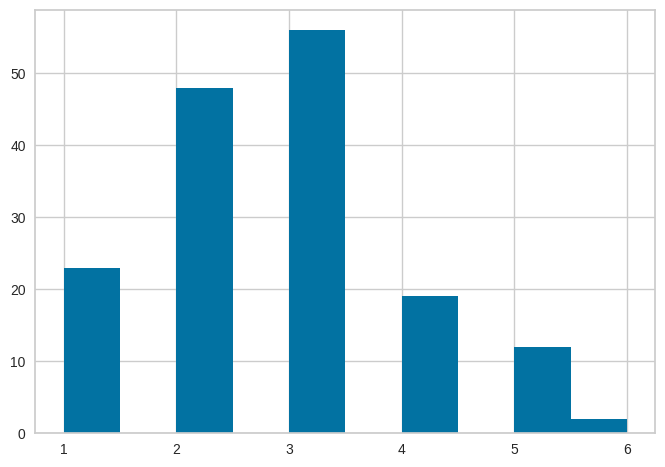

In [134]:
result.predict.hist()

<Axes: >

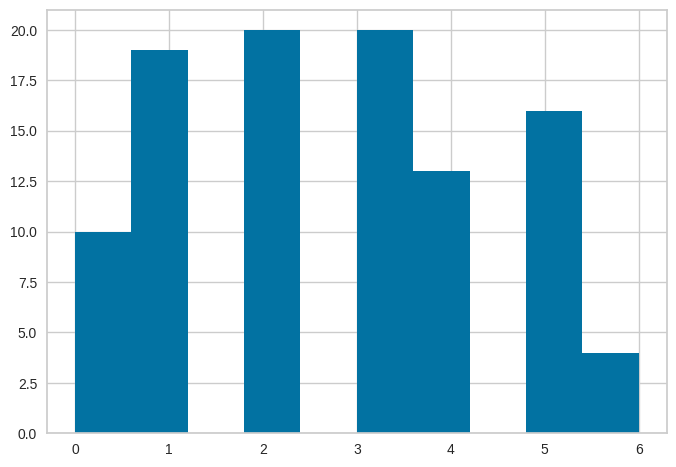

In [135]:
result.label.hist()